## Assignment 1: Multiple Regression

1. Fit a model on 'speed', 'hd', 'ram', and 'screen' and plot the residuals. 
   
   Do any features have unintuitive coefficients? 
   
   Does our model predict better for certain price ranges?  
         
     <br>         
2. Fit a model including all numeric columns (add 'trend' and 'ads' to the previous model), and plot the residuals. 
   
   Do any features have unintuitive coefficients? 
   
   Does our model predict better for certain price ranges?
   
   Which residual plot looks better?

In [48]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

computers = pd.read_csv("../Data/Computers.csv")

computers.tail()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
6254,1690,100,528,8,15,no,no,yes,39,35
6255,2223,66,850,16,15,yes,yes,yes,39,35
6256,2654,100,1200,24,15,yes,no,yes,39,35
6257,2195,100,850,16,15,yes,no,yes,39,35
6258,2490,100,850,16,17,yes,no,yes,39,35


### EDA

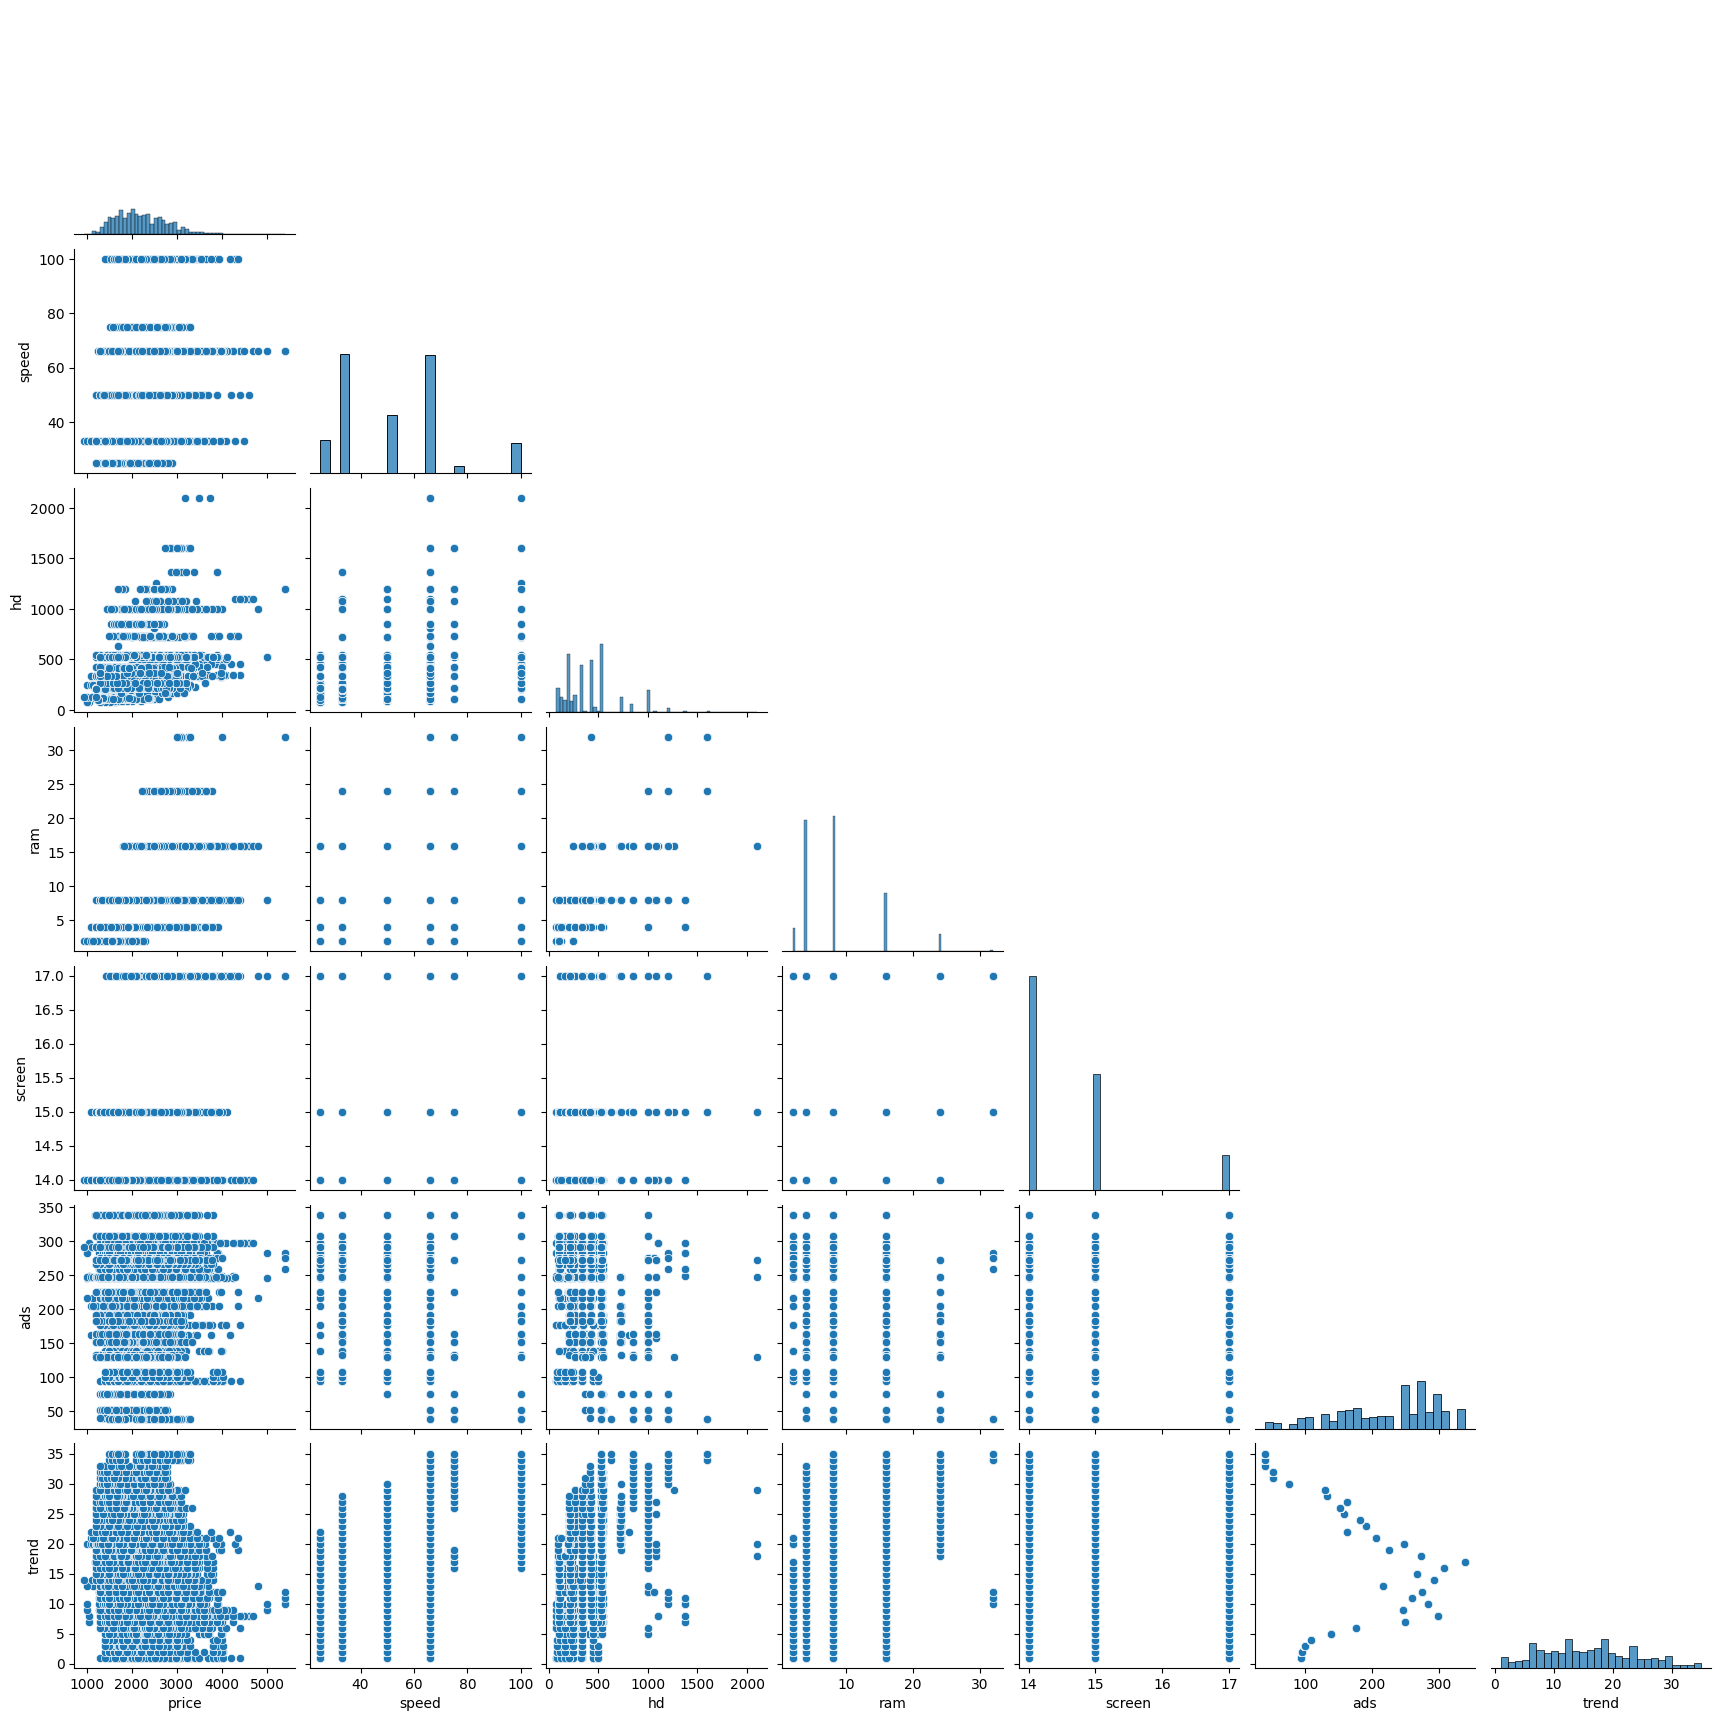

In [49]:
sns.pairplot(computers, corner=True)

<Axes: >

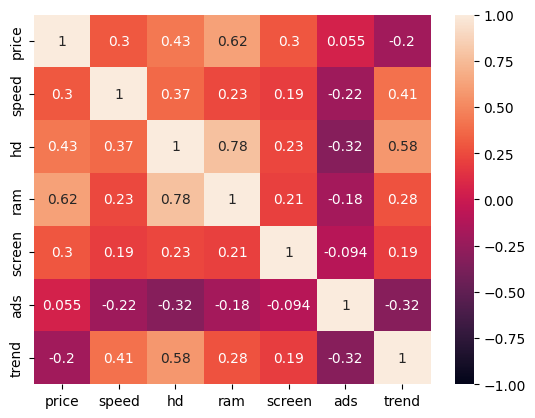

In [50]:
sns.heatmap(computers.corr(numeric_only=True), annot=True, vmin=-1, vmax=1 )

<Axes: xlabel='ads', ylabel='Count'>

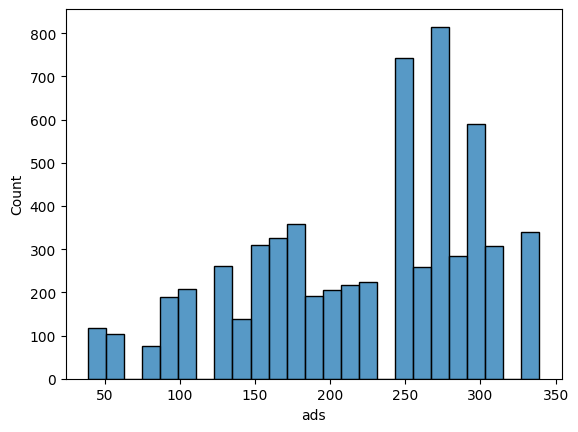

In [51]:
sns.histplot(computers["ads"])

### First Model

In [52]:
cols = ["ram", "speed", "hd", "screen"]
X=sm.add_constant(computers[cols])
y=computers.price
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     1325.
Date:                Fri, 31 Oct 2025   Prob (F-statistic):               0.00
Time:                        13:06:59   Log-Likelihood:                -46795.
No. Observations:                6259   AIC:                         9.360e+04
Df Residuals:                    6254   BIC:                         9.363e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.3331     88.222      0.117      0.907    -162.613     183.279
ram           76.7454      1.536     49.969      0.000      73.735      79.756
speed          5.2493      0.278     18.858      0.000       4.704       5.795
hd            -0.5794      0.035    -16.520      0.000      -0.648      -0.511
screen       105.5259      6.189     17.051      0.000      93.394     117.658
==============================================================================
Omnibus:                     1640.957   Durbin-Watson:                   1.484
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5072.066
Skew:                           1.340   Prob(JB):                         0.00
Kurtosis:                       6.503   Cond. No.                     8.07e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: ylabel='None'>

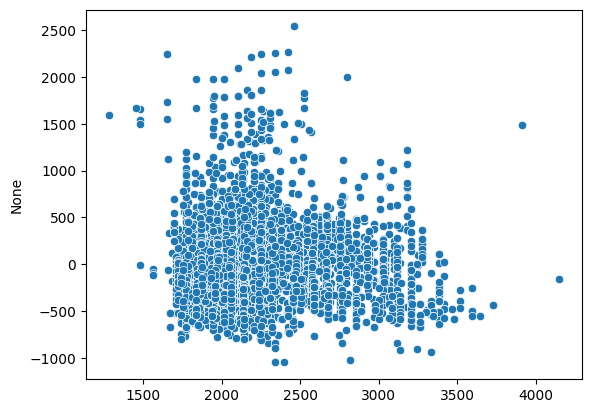

In [31]:
sns.scatterplot(x=model.predict(), y=model1.resid)

### Second Model

In [53]:
cols = ["ram", "speed", "hd", "screen", "ads", "trend"]
X=sm.add_constant(computers[cols])
y=computers.price
model = sm.OLS(y, X).fit()
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     2580.
Date:                Fri, 31 Oct 2025   Prob (F-statistic):               0.00
Time:                        13:07:02   Log-Likelihood:                -44817.
No. Observations:                6259   AIC:                         8.965e+04
Df Residuals:                    6252   BIC:                         8.969e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -246.6755     66.371     -3.717      0.000    -376.785    -116.566
ram           47.3870      1.188     39.899      0.000      45.059      49.715
speed          8.8939      0.209     42.590      0.000       8.485       9.303
hd             0.7088      0.031     22.932      0.000       0.648       0.769
screen       126.7024      4.521     28.022      0.000     117.839     135.566
ads            0.9697      0.057     17.099      0.000       0.859       1.081
trend        -47.0820      0.676    -69.660      0.000     -48.407     -45.757
==============================================================================
Omnibus:                     1407.073   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3902.981
Skew:                           1.187   Prob(JB):                         0.00
Kurtosis:                       6.054   Cond. No.                     8.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: ylabel='None'>

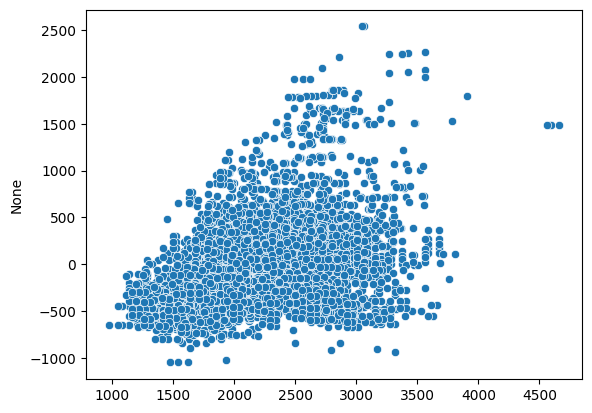

In [54]:
sns.scatterplot(x=model.predict(), y=model1.resid)

In [55]:
!git add 03_multiple_regression_assignments.ipynb
!git commit -m "multiple_regression_assignments1"
!git push origin master

[master 6bff651] multiple_regression_assignments1
 1 file changed, 84 insertions(+), 2 deletions(-)
Enumerating objects: 11, done.
Counting objects: 100% (11/11), done.
Delta compression using up to 22 threads
Compressing objects: 100% (5/5), done.
Writing objects: 100% (6/6), 2.68 KiB | 171.00 KiB/s, done.
Total 6 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To github.com:Proftg/Maven-regression.git
   3cf389f..6bff651  master -> master


## Assignment 2: Metrics

Calculate MSE and RMSE for your regression model fitted on all numeric features.

##### from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as rmse
from sklearn.metrics import r2_score as r2

print(f"MAE: {mae(y, model.predict())}")
print(f"RMSE: {rmse(y, model.predict()) ** (1/2)}")
print(f"R²: {r2(y, model.predict())}")

In [58]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as rmse
from sklearn.metrics import r2_score as r2

print(f"MAE: {mae(y, model.predict())}")
print(f"RMSE: {rmse(y, model.predict()) ** (1/2)}")
print(f"R2: {r2(y, model.predict())}")


MAE: 225.5632258662684
RMSE: 311.5017500706834
R2: 0.7123057091817092
